In [18]:
#load in packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#load in data
df = pd.read_csv('../data/USPesticides_raw.csv')
df.head()

/var/folders/vl/lnfg4f0d5872pfxx4dys19km0000gn/T/ipykernel_68376/632812221.py:2: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/USPesticides_raw.csv')


Sample ID Commod Pesticide Code       Pesticide Name Test Class  \
0  CA0401140004MKUS2     MK            125  Diphenylamine (DPA)          F   
1  CA0401140150MKUS2     MK            125  Diphenylamine (DPA)          F   
2  CA0401140273MKUS2     MK            125  Diphenylamine (DPA)          F   
3  CA0401140319MKUS2     MK            125  Diphenylamine (DPA)          F   
4  CA0401140328MKUS2     MK            125  Diphenylamine (DPA)          F   

   Concentration      LOD pp_ Confirm 1 Confirm 2 Annotate Quantitate Mean  \
0         0.0001  0.00006   M         M       NaN        Q         SM    O   
1         0.0001  0.00006   M         M       NaN        Q         SM    O   
2         0.0001  0.00006   M         M       NaN        Q         SM    O   
3         0.0001  0.00006   M         M       NaN        Q         SM    O   
4         0.0001  0.00006   M         M       NaN        Q         SM    O   

  Extract  Determ EPA Tolerance (ppm)  
0     813     7.0                0.01  
1     813     7.0                0.01  
2     813     7.0                0.01  
3     813     7.0                0.01  
4     813     7.0                0.01

# Exploratory Data Analysis (EDA) Questions
---
### A. Basic Structure & Quality
1. How many **total samples** are there?  
2. How many **unique commodities** and **unique pesticides** are tested?  
3. Are there any **missing values** in critical fields like `Concentration`, `LOD`, or `EPA Tolerance`?  
4. What is the **distribution of commodities** (fruits, vegetables, grains, etc.) in the dataset?  

1. There are 616113 total samples in the dataset

2.
There are 132 unique commidities being tested
There are 461 unique pesticides being tested

3.
                     missing_count
Concentration                    0
LOD                              0
EPA Tolerance (ppm)          67402

4.
        count
Commod       
WR      30931
AP      30559
WU      30521
GR      30375
ST      26893
PC      24789
PE      23417
CE      23056
SP      20950
PP      19904


<Figure size 1000x600 with 0 Axes>

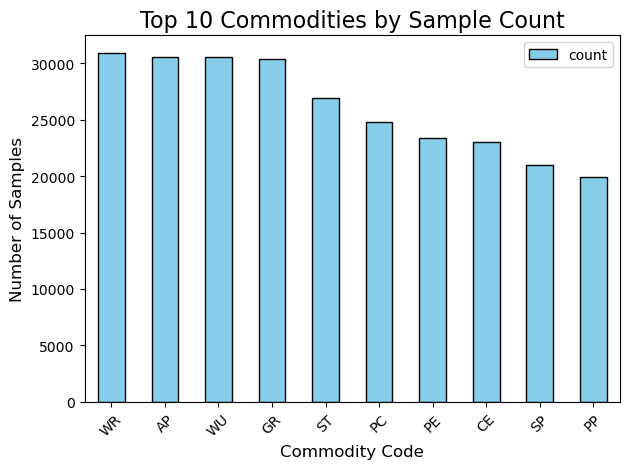

In [20]:
#1
print(f'1. There are {len(df)} total samples in the dataset\n')

#2 
print('2.')
print(f'There are {df['Commod'].nunique()} unique commidities being tested')
print(f'There are {df['Pesticide Code'].nunique()} unique pesticides being tested\n')

#3
crit_cols = ["Concentration", "LOD", "EPA Tolerance (ppm)"]
missing_summary = df[crit_cols].isna().sum().rename("missing_count").to_frame()
print('3.')
print(missing_summary)
print()

#4
print('4.')
top_commod = (
    df['Commod'].value_counts()
    .head(10)
    .rename("count")
    .to_frame()
)
print(top_commod)
plt.figure(figsize=(10,6))   # set figure size
top_commod.plot(kind="bar", color="skyblue", edgecolor="black")

# Add titles and labels
plt.title("Top 10 Commodities by Sample Count", fontsize=16)
plt.xlabel("Commodity Code", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit nicely
plt.tight_layout()

# Show the plot
plt.show()

---


### B. Concentration & Detection
5. Which **pesticides are most frequently detected**?  
6. What is the **distribution of concentration values** for the top 5 pesticides?  


In [ ]:
#5
print('5.')
top_pesticides = (
    df['Pesticide Name'].value_counts()
    .head(10)
    .rename("count")
    .to_frame()
)
print(top_pesticides)

#6
print('6.')
top5_pesticides = top_pesticides.index[:5]
concentration_distributions = df_full[df_full['Pesticide Name'].isin(top5_pesticides)].groupby('Pesticide Name')['Concentration'].describe()



5.
                count
Pesticide Name       
Thiabendazole   26500
Imidacloprid    22916
Azoxystrobin    15412
Boscalid        14977
Pyraclostrobin  14481
Fludioxonil     13850
Imazalil        11563
Acetamiprid     11368
DDE p,p'        11338
Iprodione       10984



### C. Compliance & Safety
9. How many samples **exceed the EPA tolerance**?  
10. Which commodities most frequently **exceed tolerance levels**?  
11. Are there pesticides with consistently **high rates of tolerance exceedance**?  

### D. Patterns & Trends
12. Do different **commodities share the same top pesticides**?  
13. Are there pesticides that appear in **both domestic and imported samples** (if origin info is present)?  
14. What is the **co-occurrence** of multiple pesticides in the same sample?  

### E. Advanced Exploration
15. What is the relationship between **LOD (detection sensitivity)** and the likelihood of reporting a positive detection?  
16. Can we cluster commodities based on their **pesticide profiles**?  
17. Are certain pesticides more likely to appear in **specific classes of commodities** (e.g., leafy greens vs. root vegetables)? 

---


1.